## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.
---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/Users/ChandlerShortlidge/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [2]:
pd.crosstab(df["category"], df["isBestSeller"])

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [3]:
ctab = pd.crosstab(df["category"], df["isBestSeller"])
ctab["proportion_best_seller"] = ctab[True] / (ctab[True] + ctab[False])
ctab_sorted = ctab.sort_values("proportion_best_seller", ascending=False)

ctab_sorted


isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


*The categories where being a best seller is more prevalent is Grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories, and Power & Hand Tools. This makes sense since these are the types of categories that customers need to purchase more often.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [4]:
import scipy.stats as stats

# Make a contingency table (crosstab)
ctab = pd.crosstab(df['category'], df['isBestSeller'])

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")


Chi-square statistic: 36540.20
p-value: 0.0000


*There is a statistically significant association between product category and best-seller status.*

*In other words, some categories are more likely to have best-sellers than others.*

In [5]:
n = ctab.values.sum()         # total number of observations
min_dim = min(ctab.shape) - 1 # min(num_rows, num_cols) - 1

cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramér's V: {cramers_v:.3f}")

Cramér's V: 0.122


*The strength of the association is weak, but not zero.*

*While category and best-seller status are statistically associated, the actual effect is small in practical terms.*

*Some categories do have more best-sellers, but category alone doesn’t strongly predict best-seller status.*


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_62565/1099387233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts.index, y=top_counts.values, palette="Set3")


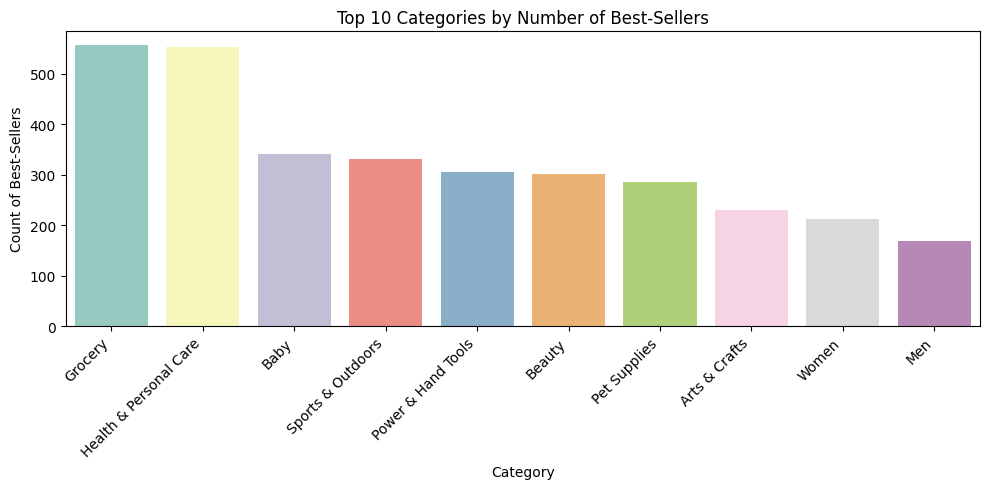

In [6]:
top_counts = ctab[True].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_counts.index, y=top_counts.values, palette="Set3")
plt.title("Top 10 Categories by Number of Best-Sellers")
plt.xlabel("Category")
plt.ylabel("Count of Best-Sellers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [13]:
q1, q3 = df["price"].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df["price"] >= lower) & (df["price"] <= upper)]


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.


/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_62565/1969197003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df["category"].isin(top20)], x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

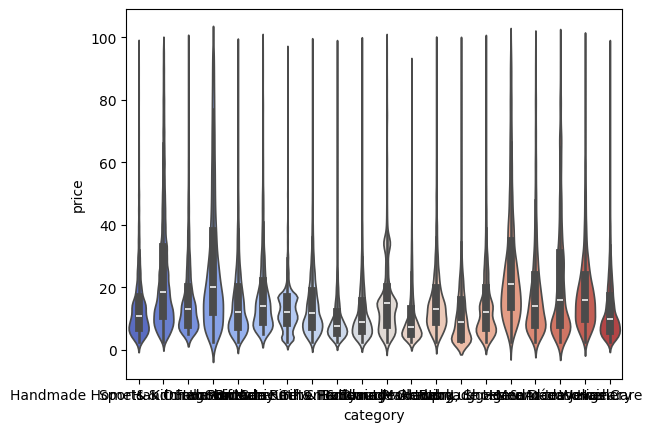

In [15]:
# Plotting a violin plot to visualize the distribution of 'category' for each 'price' category, using the "coolwarm" color palette

top20 = (df["category"].value_counts().head(20).index)

sns.violinplot(data=df[df["category"].isin(top20)], x='category', y='price', palette="coolwarm")

- Which product category tends to have the highest median price? Don't filter here by top categories.

In [18]:
df.groupby("category")["price"].median().sort_values(ascending=False).head()

category
Desktop PCs       69.990
Boxing Shoes      69.000
Tablets           68.590
Motherboards      67.005
Graphics Cards    66.240
Name: price, dtype: float64

*Desktop PCs, Boxing Shoes, Tablets, Motherboards, and Graphics Cards are the top 5 categories with the highest median price of all product categories.*

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

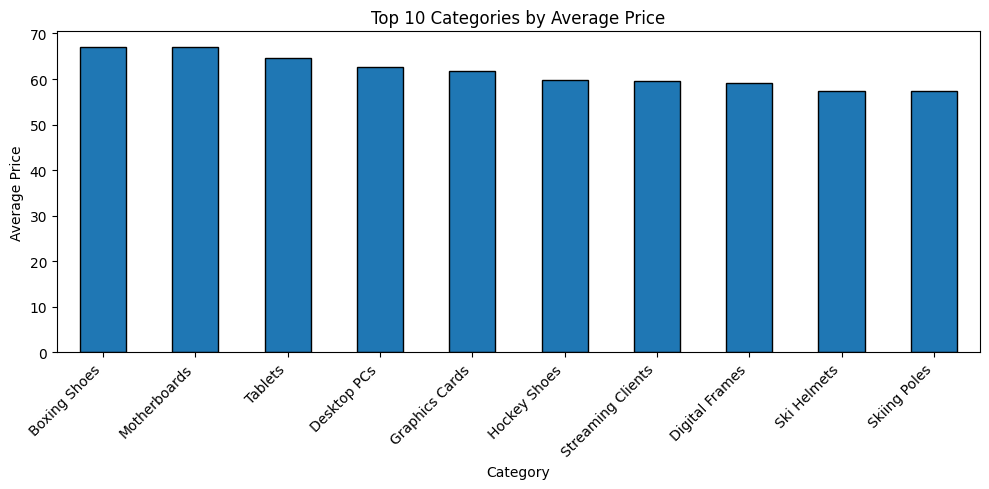

In [34]:
median_price = (df.groupby("category")["price"].mean().sort_values(ascending=False).head(10))

# 2. Plot
plt.figure(figsize=(10, 5))
median_price.plot(kind="bar", edgecolor="black")

# 3. Labels & title
plt.ylabel("Average Price")
plt.xlabel("Category")
plt.title("Top 10 Categories by Average Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



- Which product category commands the highest average price? Don't filter here by top categories.

In [39]:
df.groupby("category")["price"].mean().sort_values(ascending=False).head()

category
Boxing Shoes      67.108775
Motherboards      67.002857
Tablets           64.565584
Desktop PCs       62.560940
Graphics Cards    61.809231
Name: price, dtype: float64

*Boxing Shoes, Motherboards, Tablets, Desktop PCs, and Graphics Cards are the top 5 categories with the highest mean price of all product categories.*

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_62565/638141953.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="category", y="stars", palette="coolwarm")


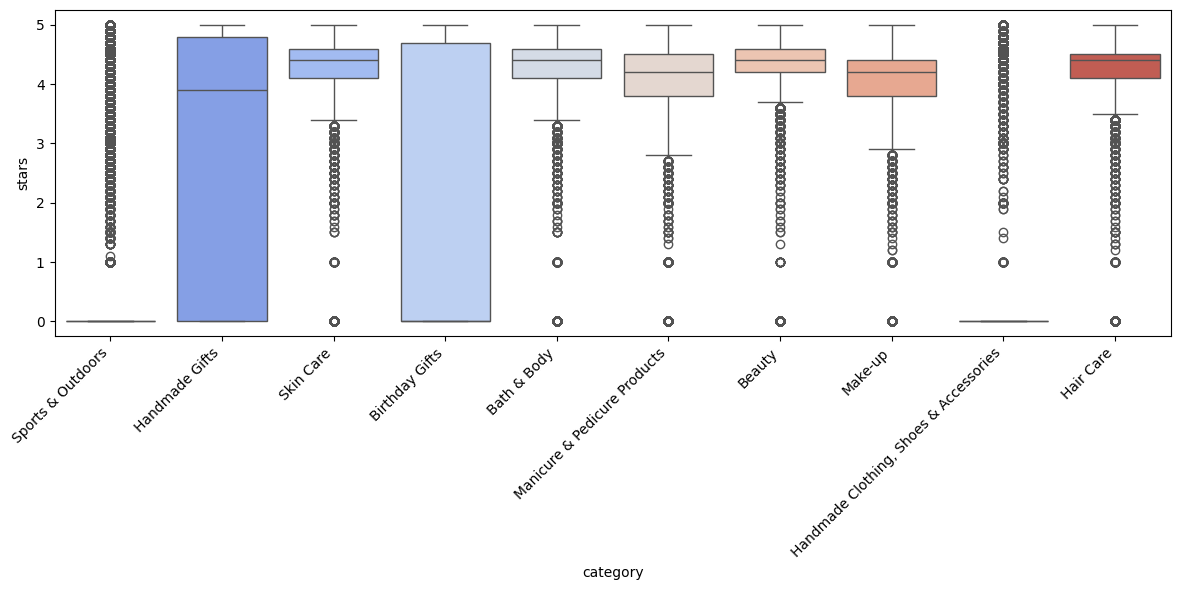

In [51]:
top10 = (df["category"].value_counts().head(10).index)


# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
df_top = df[df["category"].isin(top10)]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [55]:
df.groupby("category")["stars"].median().sort_values().head(5).index

Index(['eBook Readers & Accessories', 'Lab & Scientific Products', 'Laptops',
       'Curtain & Blind Accessories', 'Cricket Shoes'],
      dtype='object', name='category')

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	

In [56]:
# Make sure both columns are numeric and drop rows with NaNs
subset = df[["price", "stars"]].dropna()

# Pearson correlation (default)
corr_val = subset["price"].corr(subset["stars"])
print("Pearson r:", corr_val)


Pearson r: -0.08430887950662397


*A Pearson correlation of -0.084 shows there is no correlation between product price and its rating.*

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


<Axes: xlabel='stars', ylabel='price'>

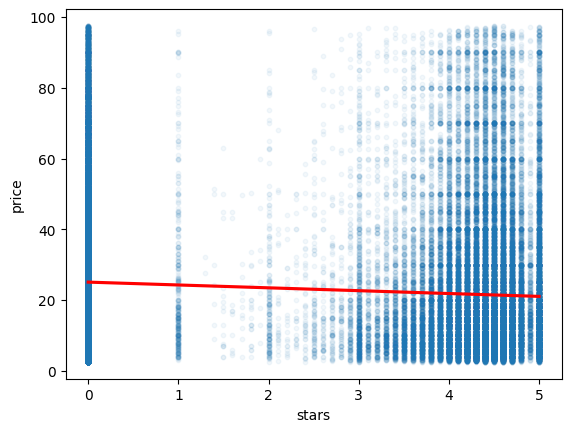

In [58]:
sns.regplot(
    x="stars",
    y="price",
    data=df.sample(100_000),  # sample to speed up
    scatter_kws={"alpha": 0.05, "s": 10},  # faint, small dots
    line_kws={"color": "red"}
)


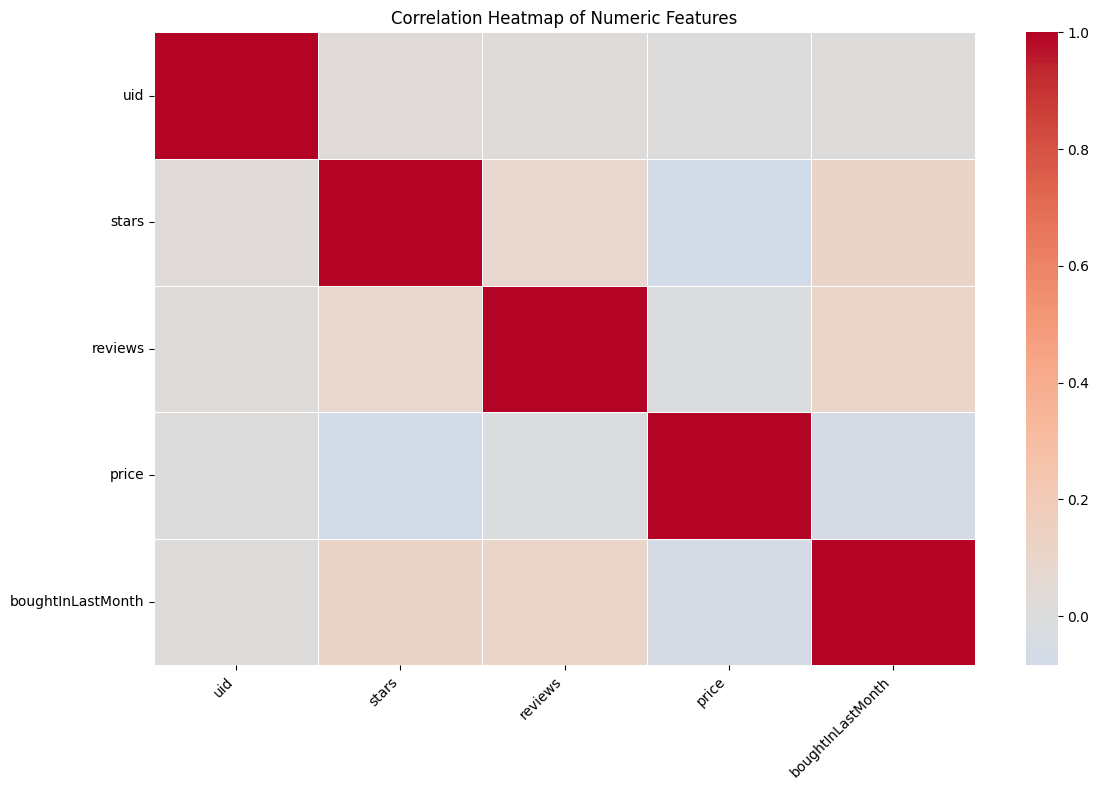

In [60]:
# 1. Select only numeric columns
numeric_df = df.select_dtypes(include="number")

# 2. Compute the correlation matrix
corr = numeric_df.corr()          # defaults to Pearson

# 3. Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,      # set True if you want numbers in each cell
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

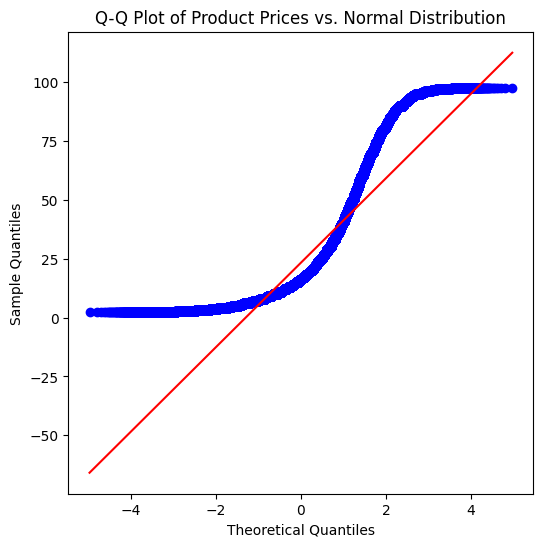

In [62]:

# Filter out zero or extreme outliers first
price = df["price"]
price = price[price > 0]          # drop zeros if they’re invalid

plt.figure(figsize=(6, 6))
stats.probplot(price, dist="norm", plot=plt)
plt.title("Q-Q Plot of Product Prices vs. Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()
